In [2]:
# AWS stuff
from boto.s3.connection import S3Connection
from boto.s3.key import Key
# OS for .env file
import os
# Data handling
import pandas as pd
import numpy as np
# Parsers
from bs4 import BeautifulSoup
from datetime import datetime
# Not needed stuff
from IPython.display import display

# Read environment file for AWS codes
env_vars = !cat .env
for var in env_vars:
    key, value = var.split('=')
    os.environ[key] = value

# Init the dicts
list_pollutants = ['NO2', 'PM10']
dict_pollutants = dict()
for pollutant in list_pollutants:
    dict_pollutants[pollutant] = dict()
    dict_pollutants[pollutant]['dataframe'] = pd.DataFrame()
    dict_pollutants[pollutant]['dict'] = dict()
    
list_date = list()
list_names = list()

# Put codes into vars
s3_id = os.environ['S3_ID']
s3_secret = os.environ['S3_SECRET']
s3_bucket = os.environ['S3_BUCKET']

conn = S3Connection(s3_id, s3_secret)
bucket = conn.get_bucket(s3_bucket) # Substitute in your bucket name
bucket_list = bucket.list();

for key in bucket_list:
    # print key.name
    
    # Get contents from key
    fp = key.get_contents_as_string()
    # Parse them into the soup
    soup = BeautifulSoup(fp, "xml")
    # Get the date and make it as datetime
    date = soup.Header.generat.get_text()
    date = datetime.strptime(date, '%d/%m/%Y %H:%M')
    if date not in list_date:    
        list_date.append(date)
    
        # Iterate over the cabinas
        for cabina in soup.Valors.find_all('cabina'):
            name = cabina.nom_cabina.get_text()
            # If the cabina is in Barcelona
            if 'Barcelona' in name:
                if name not in list_names: list_names.append(name)
                # print name + '\t' + cabina.codi_eoi.get_text()
                for pollutant in dict_pollutants.keys():
                    if (name  + '_' + pollutant) not in dict_pollutants[pollutant]['dict'].keys():
                        dict_pollutants[pollutant]['dict'][name + '_' + pollutant] = list()
                    
                    try:
                        if pollutant == 'NO2':
                            parsed_pollutant = cabina.valor_no2.get_text()
                        elif pollutant == 'PM10':
                            parsed_pollutant = cabina.valor_pm10.get_text()
                        elif pollutant == 'O3':
                            parsed_pollutant = cabina.valor_o3.get_text()
                        else:
                            print 'Pollutant not supported'
                        ocurrence = parsed_pollutant.find(' ')
                        val_pollutant = int(parsed_pollutant[0:ocurrence])
                        units_pollutant = parsed_pollutant[ocurrence:]
                        # print '\t' + str(val_pollutant) + '\t' + units_pollutant
                    except:
                        val_pollutant = 'nan'
                        # print 'No {} in this station'.format(pollutant)
                    dict_pollutants[pollutant]['dict'][name + '_' + pollutant].append(val_pollutant)

for pollutant in list_pollutants:
    dict_pollutants[pollutant]['dataframe'] = pd.DataFrame(dict_pollutants[pollutant]['dict'], index = list_date)
    dict_pollutants[pollutant]['dataframe'] = dict_pollutants[pollutant]['dataframe'].apply(pd.to_numeric, errors='coerce')    
    print pollutant
    display(dict_pollutants[pollutant]['dataframe'])

NO2


,Barcelona - Ciutadella_NO2,Barcelona - Eixample_NO2,Barcelona - Gràcia_NO2,Barcelona - Observ Fabra_NO2,Barcelona - Palau Reial_NO2,Barcelona - Poblenou_NO2,Barcelona - Sants_NO2,Barcelona - Vall Hebron_NO2
2018-10-03 15:00:00,57.0,58.0,36.0,8.0,15.0,33,13.0,11
2018-10-03 16:00:00,60.0,65.0,36.0,8.0,14.0,40,15.0,12
2018-10-03 17:00:00,60.0,65.0,36.0,9.0,16.0,52,14.0,14
2018-10-03 18:00:00,32.0,65.0,NaN,8.0,17.0,47,14.0,15
2018-10-03 19:00:00,35.0,NaN,NaN,7.0,30.0,44,18.0,22
2018-10-03 20:00:00,43.0,NaN,NaN,7.0,49.0,43,34.0,38
2018-10-03 21:00:00,49.0,NaN,NaN,5.0,49.0,45,33.0,27
2018-10-03 22:00:00,54.0,57.0,45.0,4.0,37.0,41,28.0,41
2018-10-03 23:00:00,45.0,NaN,41.0,9.0,52.0,58,70.0,88
2018-10-04 00:00:00,41.0,57.0,34.0,11.0,38.0,78,41.0,71


PM10


,Barcelona - Ciutadella_PM10,Barcelona - Eixample_PM10,Barcelona - Gràcia_PM10,Barcelona - Observ Fabra_PM10,Barcelona - Palau Reial_PM10,Barcelona - Poblenou_PM10,Barcelona - Sants_PM10,Barcelona - Vall Hebron_PM10
2018-10-03 15:00:00,NaN,45,NaN,NaN,30.0,74,NaN,28
2018-10-03 16:00:00,NaN,44,NaN,NaN,30.0,73,NaN,29
2018-10-03 17:00:00,NaN,44,NaN,NaN,30.0,73,NaN,28
2018-10-03 18:00:00,NaN,44,NaN,NaN,29.0,63,NaN,27
2018-10-03 19:00:00,NaN,43,NaN,NaN,29.0,61,NaN,26
2018-10-03 20:00:00,NaN,42,NaN,NaN,29.0,60,NaN,26
2018-10-03 21:00:00,NaN,41,NaN,NaN,28.0,59,NaN,25
2018-10-03 22:00:00,NaN,41,NaN,NaN,28.0,58,NaN,25
2018-10-03 23:00:00,NaN,41,NaN,NaN,27.0,58,NaN,25
2018-10-04 00:00:00,NaN,41,NaN,NaN,27.0,58,NaN,24


---------- NO2 -----------
Barcelona - Ciutadella_NO2       79.0
Barcelona - Eixample_NO2        113.0
Barcelona - Gràcia_NO2           98.0
Barcelona - Observ Fabra_NO2     43.0
Barcelona - Palau Reial_NO2     109.0
Barcelona - Poblenou_NO2         81.0
Barcelona - Sants_NO2            92.0
Barcelona - Vall Hebron_NO2      88.0
dtype: float64
Barcelona - Ciutadella_NO2       1.0
Barcelona - Eixample_NO2        10.0
Barcelona - Gràcia_NO2           5.0
Barcelona - Observ Fabra_NO2     1.0
Barcelona - Palau Reial_NO2      2.0
Barcelona - Poblenou_NO2         3.0
Barcelona - Sants_NO2            3.0
Barcelona - Vall Hebron_NO2      2.0
dtype: float64
Max of all stations for NO2 113.0
Min of all stations for NO2 1.0


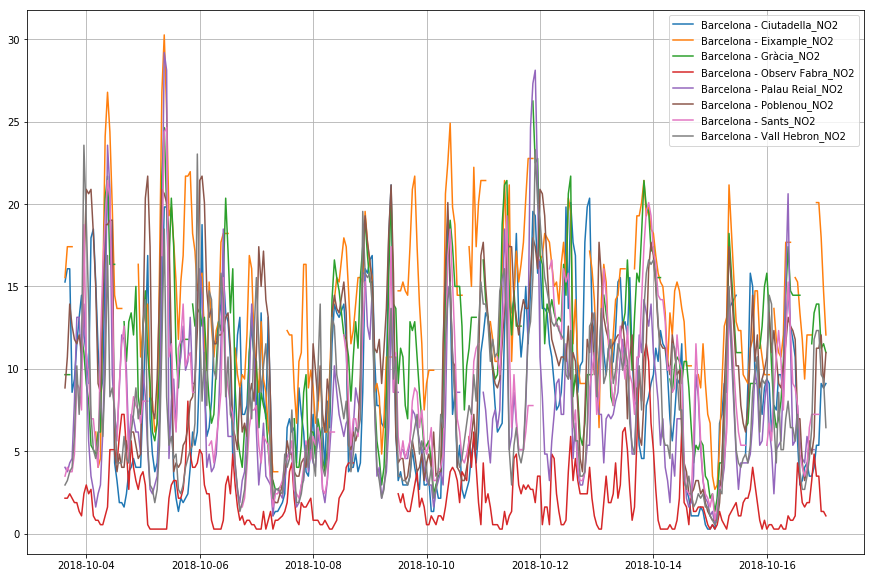

---------- PM10 -----------
Barcelona - Ciutadella_PM10       NaN
Barcelona - Eixample_PM10        45.0
Barcelona - Gràcia_PM10           NaN
Barcelona - Observ Fabra_PM10    21.0
Barcelona - Palau Reial_PM10     30.0
Barcelona - Poblenou_PM10        74.0
Barcelona - Sants_PM10            NaN
Barcelona - Vall Hebron_PM10     30.0
dtype: float64
Barcelona - Ciutadella_PM10       NaN
Barcelona - Eixample_PM10        14.0
Barcelona - Gràcia_PM10           NaN
Barcelona - Observ Fabra_PM10     6.0
Barcelona - Palau Reial_PM10      9.0
Barcelona - Poblenou_PM10        13.0
Barcelona - Sants_PM10            NaN
Barcelona - Vall Hebron_PM10      5.0
dtype: float64
Max of all stations for PM10 74.0
Min of all stations for PM10 5.0


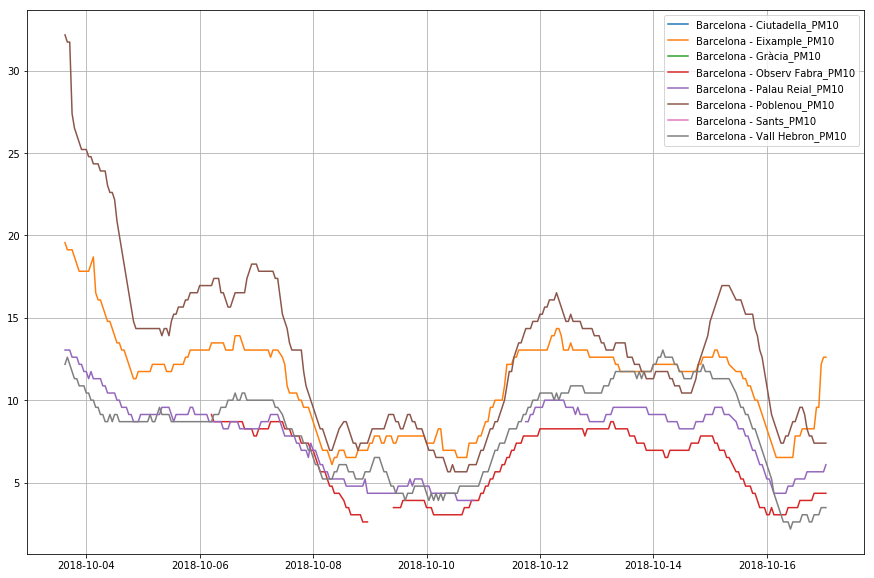

In [296]:
import matplotlib.pyplot as plot

append_rel = '_REL'
# Stuff for LEDs
val_max = 30
val_min = 0

# Min - Max calculation
for pollutant in list_pollutants:
    print '---------- {} -----------'.format(pollutant)
    # display(dict_pollutants[pollutant]['dataframe'])

    dict_pollutants[pollutant]['dataframe'].drop([i for i in dict_pollutants[pollutant]['dataframe'].columns if append_rel in i], axis=1, inplace=True)
    
    maxStation = dict_pollutants[pollutant]['dataframe'].max(axis=0, skipna = True)
    minStation = dict_pollutants[pollutant]['dataframe'].min(axis=0, skipna = True)
    print maxStation
    print minStation
    maxOfAll = maxStation.max()
    minOfAll = minStation.min()
    print 'Max of all stations for {} '.format(pollutant) + str(maxOfAll)
    print 'Min of all stations for {} '.format(pollutant) + str(minOfAll)

    fig = plot.figure(figsize = (15,10))

    for column in dict_pollutants[pollutant]['dataframe'].columns:
        dict_pollutants[pollutant]['dataframe'][column + '_REL'] = (dict_pollutants[pollutant]['dataframe'][column]/(maxOfAll - minOfAll)*(val_max-val_min) + val_min)
        plot.plot(dict_pollutants[pollutant]['dataframe'].index, dict_pollutants[pollutant]['dataframe'][column + '_REL'], label = column)
    plot.grid(True)
    plot.legend(loc='best')
    plot.show() 

[-4, 8, 20, 24]


,Barcelona - Sants,Barcelona - Eixample,Barcelona - Gràcia,Barcelona - Ciutadella,Barcelona - Vall Hebron,Barcelona - Palau Reial,Barcelona - Poblenou,Barcelona - Observ Fabra,session
2018-10-03 15:00:00,3,17,9,15,7,8,20,2,Day
2018-10-03 16:00:00,4,18,9,16,7,8,21,2,Day
2018-10-03 17:00:00,3,18,9,16,7,8,22,2,Day
2018-10-03 18:00:00,3,18,9,8,7,8,19,2,Day
2018-10-03 19:00:00,4,18,9,9,8,10,19,1,Day
2018-10-03 20:00:00,9,18,9,11,10,12,18,1,Day
2018-10-03 21:00:00,8,18,9,13,9,12,18,1,Night
2018-10-03 22:00:00,7,16,12,14,10,11,18,1,Night
2018-10-03 23:00:00,18,16,10,12,17,12,20,2,Night
2018-10-04 00:00:00,10,16,9,10,14,10,23,2,NighT


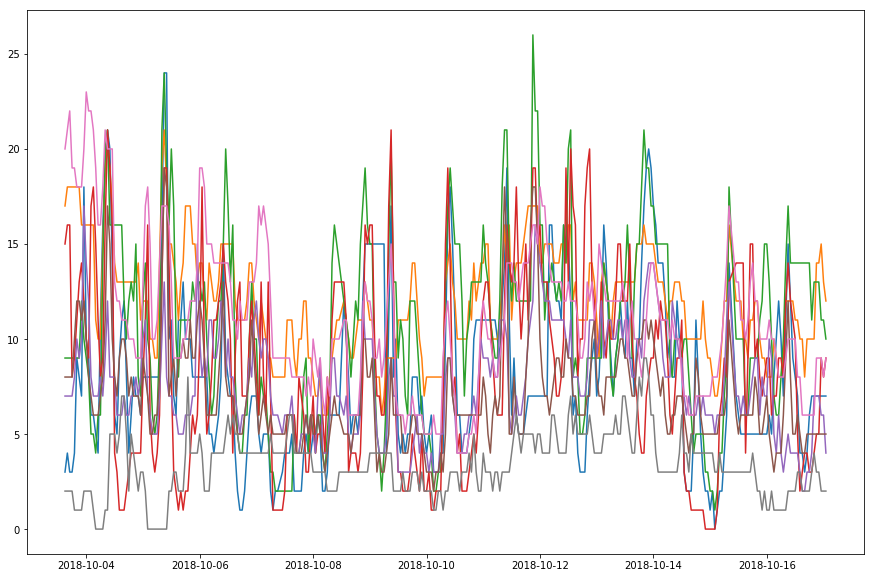

In [297]:
import math

dataframePollIndex = pd.DataFrame(columns = list_names, index = list_date)
average_val = 0
# A bit of hardcoding here
for column in dataframePollIndex.columns:
    for date in dataframePollIndex.index:
        no2_val = dict_pollutants['NO2']['dataframe'].loc[date, column + '_NO2' + append_rel]
        pm10_val = dict_pollutants['PM10']['dataframe'].loc[date, column + '_PM10' + append_rel]
        # Take average of both if they are not nan, or the no2 or the previous one
        if not math.isnan(no2_val):
            if not math.isnan(pm10_val):
                average_val = (no2_val + pm10_val)/2
            else:
                average_val = no2_val
        dataframePollIndex.loc[date, column] = int(average_val)

# Assign Labels
# I can't assign the same categorical label twice, so we replace NighT by Night in the csv
labels = ['NighT', 'Day', 'Night']    
#vector_time = np.arange(0, 25, 12)
vector_time = [-4, 8, 20, 24]
print vector_time
dataframePollIndex = dataframePollIndex.assign(session=pd.cut(dataframePollIndex.index.hour,
                                            vector_time,
                                            labels=labels))
display(dataframePollIndex)

fig = plot.figure(figsize = (15,10))
for column in dataframePollIndex:
    if column != 'session':
        plot.plot(dataframePollIndex.index, dataframePollIndex[column])
plot.show()

In [299]:
from os.path import join

for pollutant in list_pollutants:
    path = join(os.getcwd(), pollutant + '_BCN.csv')
    dict_pollutants[pollutant]['dataframe'].to_csv(path, sep = ',', encoding='utf-8')
    print 'Exported to ' + path

pathINDEX = join(os.getcwd(), 'INDEX_BCN.csv')
dataframePollIndex.to_csv(pathINDEX, sep = ',', encoding='utf-8')
print 'Exported to ' + pathINDEX

Exported to /Users/macoscar/Documents/04_Projects/02_FabLab/02_SmartCitizen/04_iScape/99_DataAnalysis/ParserXML/NO2_BCN.csv
Exported to /Users/macoscar/Documents/04_Projects/02_FabLab/02_SmartCitizen/04_iScape/99_DataAnalysis/ParserXML/PM10_BCN.csv
